# Car Price Prediction Model

## Preparing for the Cleanup

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:

df = pd.read_excel('DataSet.xlsx')

## Dataset Before Cleanup

In [ ]:
# describing the dataset before the cleanup
df.describe()

,Year,Cylinders,Fuel Economy Highway,Fuel Economy City,Fuel Economy Average,Seats,Horsepower,Miles Driven,Number of Owners,Sale Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2008.939100,5.545200,29.214070,21.594410,25.405260,4.646200,212.891700,97578.00000,3.014100,32116.962000
std,8.374402,1.356371,5.456494,4.032879,4.744653,1.671139,61.625733,119896.74991,1.415592,13462.947715
min,1995.000000,4.000000,13.200000,9.800000,11.500000,2.000000,120.000000,0.00000,1.000000,2000.000000
25%,2002.000000,4.000000,25.900000,19.100000,22.500000,4.000000,167.000000,0.00000,2.000000,24475.000000
50%,2009.000000,6.000000,28.900000,21.300000,25.100000,5.000000,205.000000,24000.00000,3.000000,34000.000000
75%,2016.000000,6.000000,33.000000,24.400000,28.700000,5.000000,241.000000,192000.00000,4.000000,43000.000000
max,2023.000000,8.000000,46.800000,34.600000,40.700000,7.000000,414.000000,360000.00000,5.000000,57060.000000


In [ ]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 10000 non-null  object 
 1   Model                 10000 non-null  object 
 2   Year                  10000 non-null  int64  
 3   Body Type             10000 non-null  object 
 4   Cylinders             10000 non-null  int64  
 5   Fuel Economy Highway  10000 non-null  float64
 6   Fuel Economy City     10000 non-null  float64
 7   Fuel Economy Average  10000 non-null  float64
 8   Seats                 10000 non-null  int64  
 9   Transmission          10000 non-null  object 
 10  Make                  10000 non-null  object 
 11  Style                 10000 non-null  object 
 12  Horsepower            10000 non-null  int64  
 13  Fuel Type             10000 non-null  object 
 14  Color                 10000 non-null  object 
 15  Miles Driven        

## Removing Unnecessary Columns

In [ ]:
#removing unnecessary columns
unnecessaryCols = ['Body Type', 'Style', 'Make']
df.drop(columns=unnecessaryCols, inplace=True)
print(f"{len(unnecessaryCols)} unnecessary columns have been removed")

3 unnecessary columns have been removed


## Correcting/Setting Compatible Data Types

In [ ]:
# changing values in Damages to string to nullify the impact of NaN
df['Damages'] = df['Damages'].astype(str)
print("Damages data type has been changed to string.\nNaN has been converted a string variable of nan.")

Damages data type has been changed to string.
NaN has been converted a string variable of nan.


## Distribution

In [ ]:
# Count unique Brand+Model+Year combinations
unique_count = df.groupby(['Brand', 'Model', 'Year']).ngroups
print(f"Total unique Brand+Model+Year combinations: {unique_count}\n")

model_counts = (
    df.groupby(['Brand', 'Model'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Brand', 'Count'], ascending=[True, False])
)

display(model_counts)

Total unique Brand+Model+Year combinations: 1450



,Brand,Model,Count
0,BMW,3 Series,225
4,BMW,X5,212
3,BMW,X3,194
2,BMW,M4,191
1,BMW,5 Series,188
6,Chevrolet,Impala,205
7,Chevrolet,Malibu,204
9,Chevrolet,Tahoe,198
8,Chevrolet,Silverado,186
5,Chevrolet,Equinox,185


### Target Variable (Sale Price/Y Variable) Spread

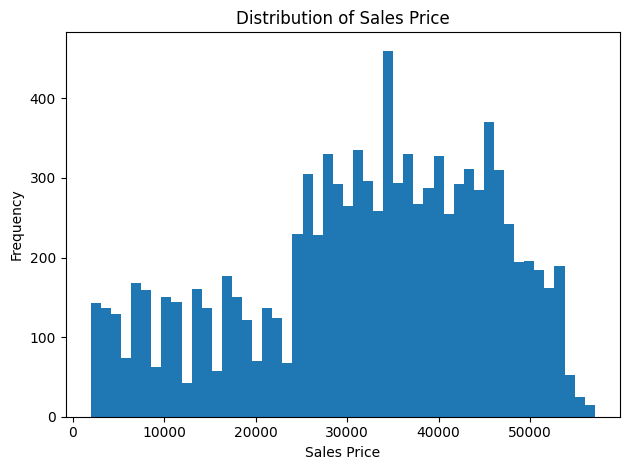

In [ ]:
#Sale Price Spread
df['Sale Price'].hist(bins=50)
plt.title("Distribution of Sales Price")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()

### Feature (Input Variables/X Variables) Distribution


Percentage distribution:
Year
1995    3.39
1996    3.32
1997    3.36
1998    3.73
1999    3.70
2000    3.50
2001    3.40
2002    3.41
2003    3.61
2004    3.65
2005    3.61
2006    3.35
2007    3.47
2008    3.45
2009    3.31
2010    3.35
2011    3.30
2012    3.10
2013    3.52
2014    3.48
2015    3.59
2016    3.46
2017    3.51
2018    3.04
2019    3.55
2020    3.49
2021    3.52
2022    3.44
2023    3.39
Name: count, dtype: float64




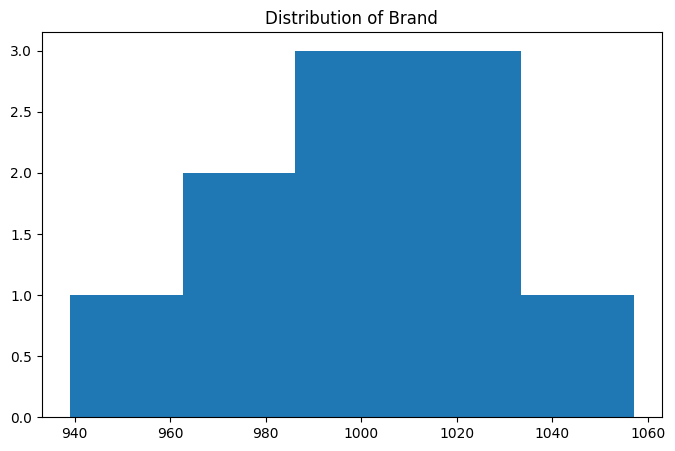

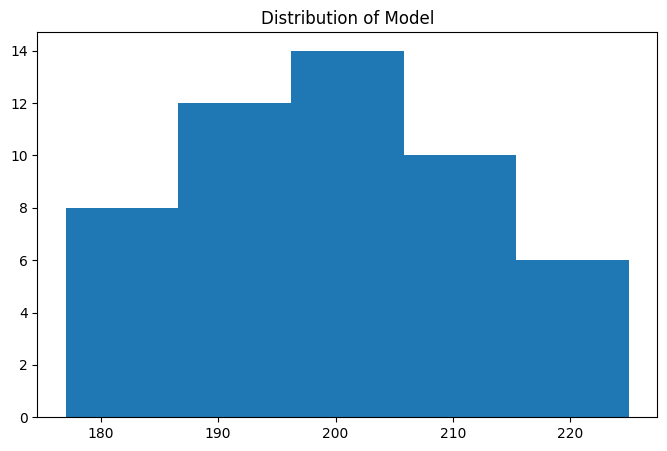

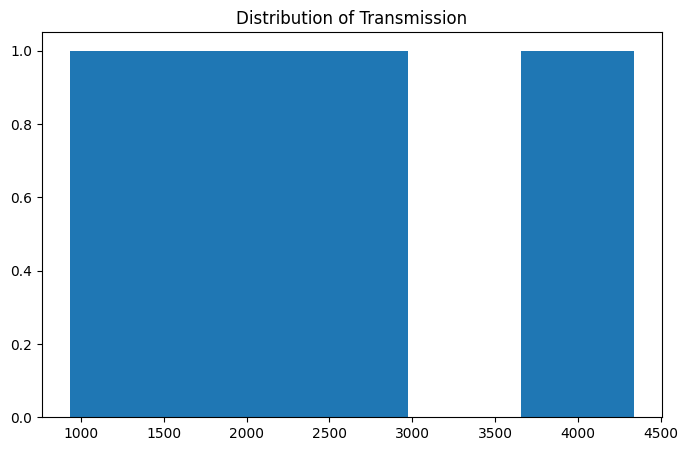

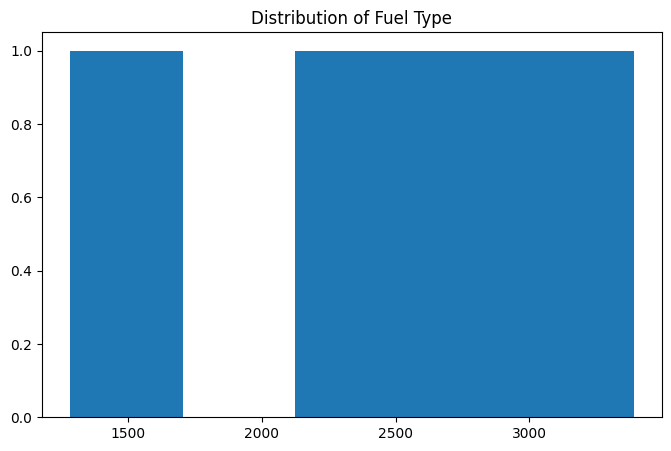

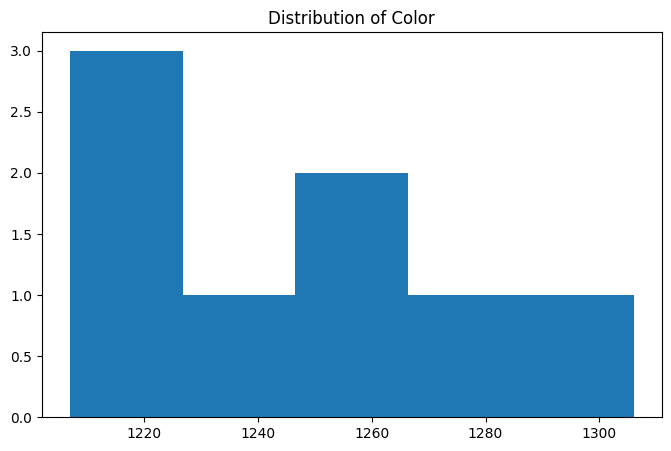

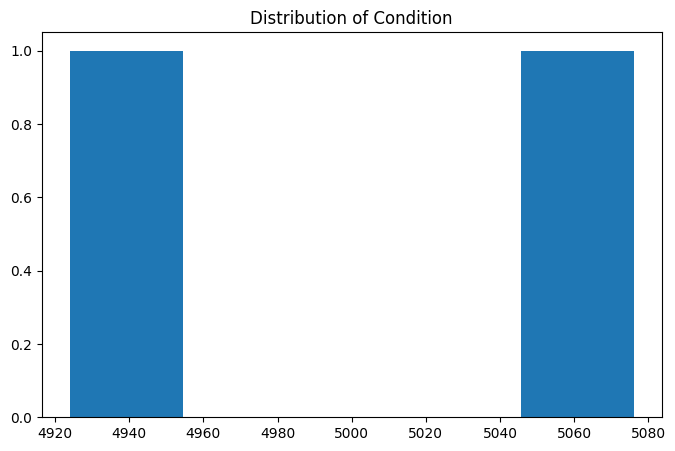

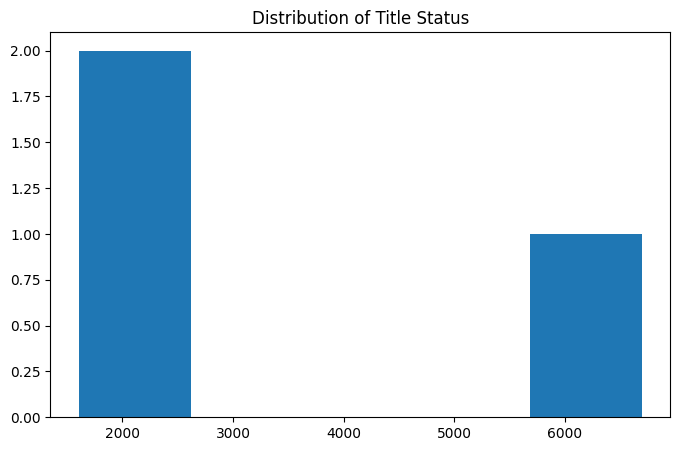

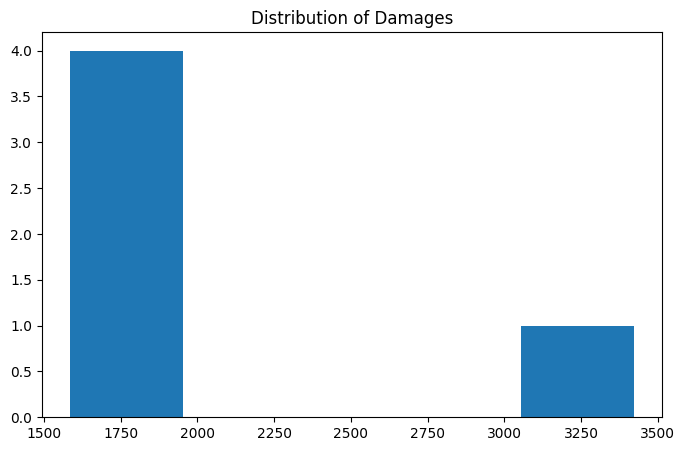

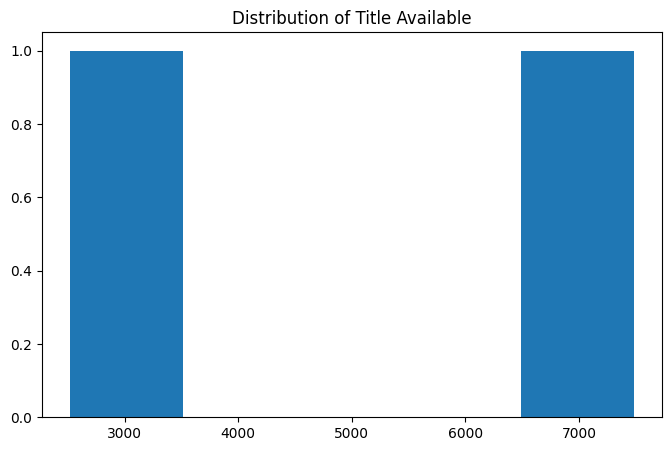

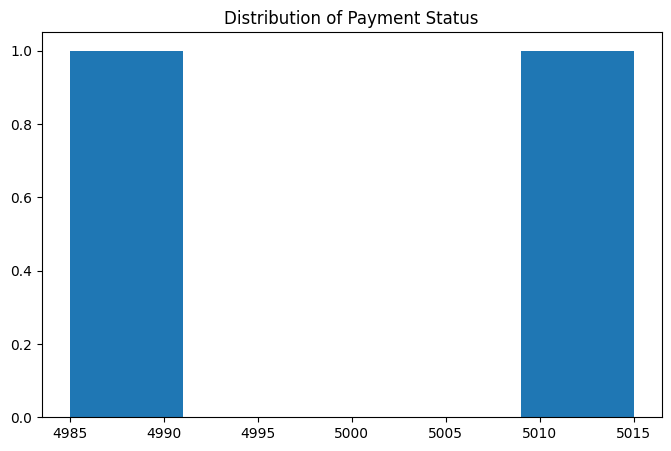

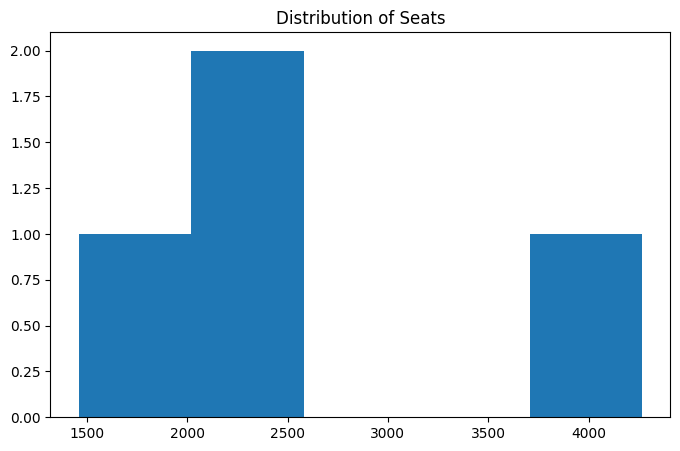

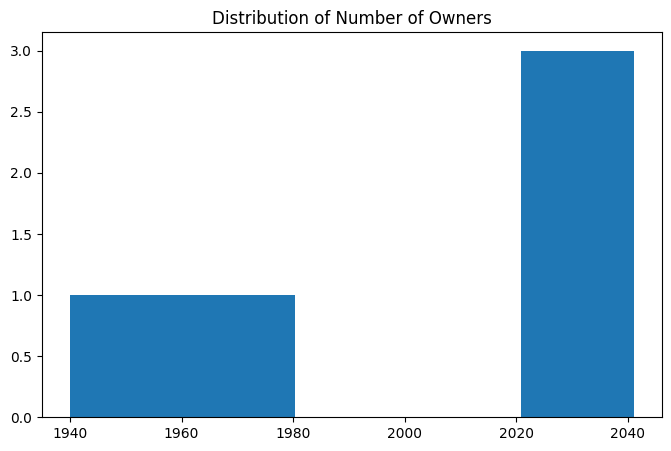

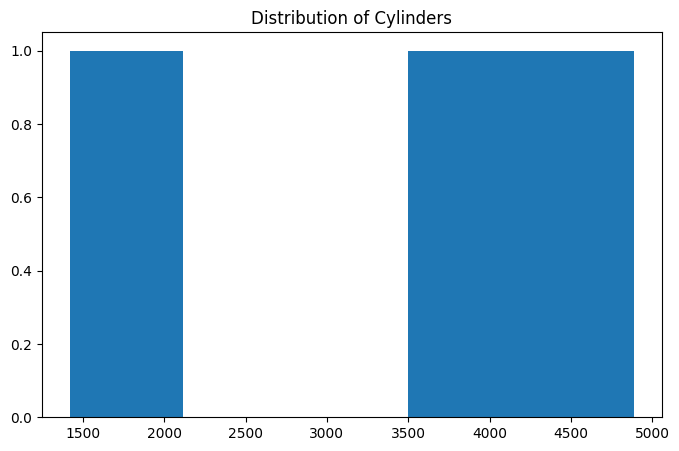

In [ ]:
#Feature Distibution in bar charts
catCols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numColsPercentage = ['Year']
numColsChart = df[['Seats', 'Number of Owners', 'Cylinders']]

print("\nPercentage distribution:")

for column in numColsPercentage:
    print(((df[column].value_counts().sort_index()/len(df[column])) * 100))  # Percentages
    print("\n")

for column in catCols:
    plt.figure(figsize=(8,5))
    df[column].value_counts().plot.hist(bins= 5)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

for column in numColsChart:
    plt.figure(figsize=(8,5))
    df[column].value_counts().plot.hist(bins = 5)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

### Heatmap of Numerical Features

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sale_price_corr = correlation_matrix["Sale Price"].sort_values(ascending=False)

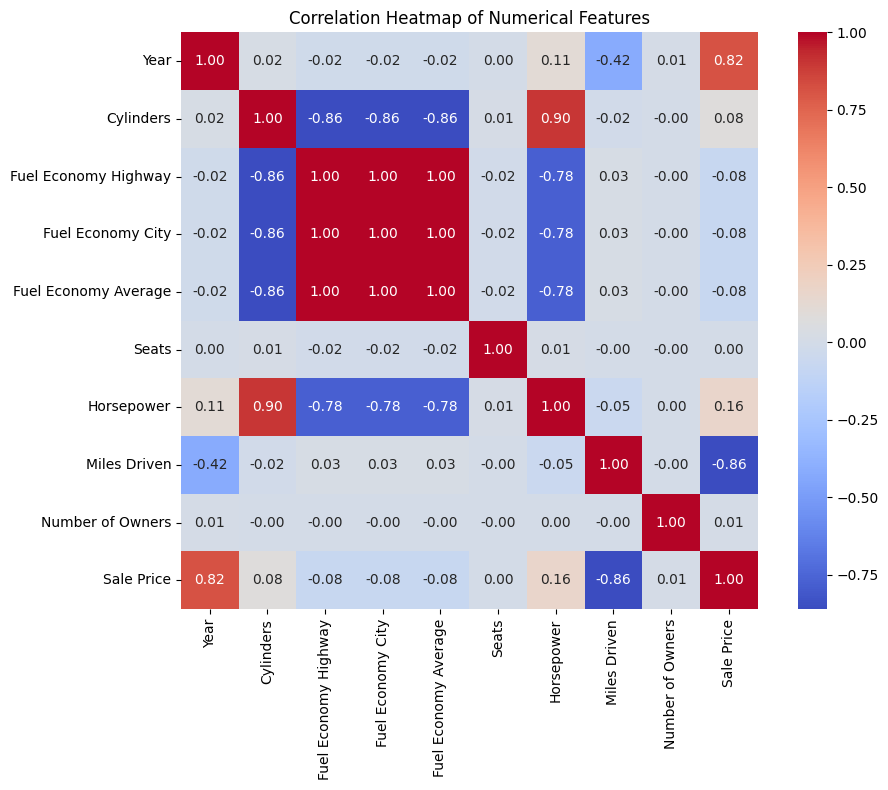

Top correlations with sales price:
 6890    57060
181     57060
3564    57040
4618    57020
9201    56800
        ...  
6460     2000
9411     2000
8915     2000
1238     2000
1282     2000
Name: Sale Price, Length: 10000, dtype: int64


In [ ]:
# Correlation Heatmap
# Calculate the correlation matrix before plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Assuming 'sale_price_corr' has been calculated
print("Top correlations with sales price:\n", df['Sale Price'].sort_values(ascending=False))

# Finding Null Values & Outliers

In [ ]:
# null count
print(df.isnull().sum())
print (f"\n 0 null values detected.")

Brand                   0
Model                   0
Year                    0
Cylinders               0
Fuel Economy Highway    0
Fuel Economy City       0
Fuel Economy Average    0
Seats                   0
Transmission            0
Horsepower              0
Fuel Type               0
Color                   0
Miles Driven            0
Condition               0
Title Status            0
Damages                 0
Number of Owners        0
Title Available         0
Payment Status          0
Sale Price              0
dtype: int64

 0 null values detected.


In [ ]:
def removeOutliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns.tolist():
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df = removeOutliers(df)
df.shape
print (f"{df.shape} \n No Outliers found \n No Outliers Removed")

(5456, 20) 
 No Outliers found 
 No Outliers Removed


# Conceptual Errors/Industry Knowledge Utilization

In [ ]:
# remove rows with odd cylinders
oddC = df[df['Cylinders'] % 2 == 1]
print (f"Rows with odd number of Cylinders: {len(oddC)}")
df = df[df['Cylinders'] % 2 == 0]
print (f" The dataset now has only even number of Cylinders")

# New cars with miles greater than 0
newCarMiles = df[(df['Condition'] == 'New') & (df['Miles Driven'] > 0)]
print(f"\nNew Cars with Mileage > 0: {len(newCarMiles)}")
df.loc[(df['Condition'] == 'New') & (df['Miles Driven'] > 0), 'Miles Driven'] = 0
print (f" New Cars' mileage has been set to 0")

# Fuel Economy Average > Fuel Economy Highway (illogical)
fuelEcon = df[df['Fuel Economy Average'] > df['Fuel Economy Highway']]
print(f"\nRows with Fuel Economy Avg > Highway: {len(fuelEcon)}")
df = df[df['Fuel Economy Average'] <= df['Fuel Economy Highway']]
print (f" The dataset now has cars that have Fuel Economy Highway > Fuel Economy Average")

# Invalid Sale Price (<=0)
invalidPrice = df[df['Sale Price'] <= 0]
print(f"\nRows with Invalid Sale Price: {len(invalidPrice)}")
df = df[df['Sale Price'] > 0]
print (f" Rows with Invalid Sale Prices have been removed")


# 6. Invalid Horsepower (<50 or >1500)
invalidHP = df[(df['Horsepower'] < 50) | (df['Horsepower'] > 1000)]
print(f"\nRows with Invalid Horsepower: {len(invalidHP)}")
df = df[(df['Horsepower'] >= 50) & (df['Horsepower'] <= 1000)]
print (f" Rows with Invalid Horse Power have been removed")

Rows with odd number of Cylinders: 0
 The dataset now has only even number of Cylinders

New Cars with Mileage > 0: 0
 New Cars' mileage has been set to 0

Rows with Fuel Economy Avg > Highway: 0
 The dataset now has cars that have Fuel Economy Highway > Fuel Economy Average

Rows with Invalid Sale Price: 0
 Rows with Invalid Sale Prices have been removed

Rows with Invalid Horsepower: 0
 Rows with Invalid Horse Power have been removed


In [ ]:
#Clean title and 0 miles for new cars along with a new car age column for better processing
df.loc[df['Condition'] == 'New', 'Miles Driven'] = 0
df.loc[df['Condition'] == 'New', 'Number of Owners'] = 0
df.loc[df['Condition'] == 'New', 'Title Status'] = 'Clean'
df[df['Condition'] == 'New'][['Miles Driven', 'Title Status']].value_counts()

df['Car Age'] = 2025 - df['Year']


In [ ]:
#Showing the first 5 rows to check proper execution
df.head()

,Brand,Model,Year,Cylinders,Fuel Economy Highway,Fuel Economy City,Fuel Economy Average,Seats,Transmission,Horsepower,...,Color,Miles Driven,Condition,Title Status,Damages,Number of Owners,Title Available,Payment Status,Sale Price,Car Age
1,Subaru,Legacy,2008,4,30.9,22.9,26.9,4,Dual-Clutch,150,...,Black,0,New,Clean,nan,0,Available,Unpaid,38000,17
3,BMW,5 Series,2018,4,30.2,22.4,26.3,5,CVT,184,...,Black,84000,Used,Rebuilt,Severe Collision,4,Available,Unpaid,38800,7
4,Subaru,Forester,2008,6,28.7,21.2,25.0,5,Automatic,251,...,Black,204000,Used,Rebuilt,Flood Damage,1,Not Available,Unpaid,23820,17
5,Honda,CR-V,1997,6,25.5,18.9,22.2,5,CVT,246,...,Black,336000,Used,Clean,nan,5,Available,Paid,6120,28
8,Honda,Pilot,2001,8,22.5,16.7,19.6,5,Manual,306,...,Black,0,New,Clean,Frame Damage,0,Available,Paid,33120,24


# Label Encoding for Ordinal Columns

In [ ]:
# label encoding for binary ordinal columns
ordCols = ['Payment Status', 'Title Available', 'Condition', 'Year']
lEncoder = LabelEncoder()
for column in ordCols:
    if column in df.columns:
        df[column] = lEncoder.fit_transform(df[column])
        print (f" \n{column} has been assigned numerical ordinal values")

 
Payment Status has been assigned numerical ordinal values
 
Title Available has been assigned numerical ordinal values
 
Condition has been assigned numerical ordinal values
 
Year has been assigned numerical ordinal values


# One-Hot Encoding for Nominal Values

## Categorical Column Distribution Before One-Hot Encoding (Calculation and Debugging Step)

In [ ]:
catColsUnique = df.select_dtypes(include=['object', 'category']).columns
print (f"Columns and the number of unique values in them:\n{df[catColsUnique].nunique()}")

numCatCols=df.select_dtypes(include=['object', 'category']).shape[1]
print (f"\nTotal number of categorical columns before one-hot encoding: {numCatCols}")

Columns and the number of unique values in them:
Brand           10
Model           50
Transmission     4
Fuel Type        4
Color            8
Title Status     3
Damages          5
dtype: int64

Total number of categorical columns before one-hot encoding: 7


## One-Hot Encoding

In [ ]:
catCols = df.select_dtypes(include=['object', 'category']).columns.tolist() #turns all the categorical/object columns in the dataset into a pyhton list
df = pd.get_dummies(df, columns=catCols, drop_first=True) #drop first category to make it a reference category and avoid multicolinearity

for column in df.columns:
    objColSum=0
    if df[column].dtype == 'object':
        objColSum += 0

print (f"Number of categorical columns after one-hot encoding: {objColSum}")

Number of categorical columns after one-hot encoding: 0


## Convert Boolean to Integer
* One-Hot Encoding results in Boolean data type

In [ ]:
boolCols = df.select_dtypes(include=['bool']).columns
df[boolCols] = df[boolCols].astype(int)
print(f"Boolean Values have been converted to numerical binary values")

Boolean Values have been converted to numerical binary values


## Categorical Column Distribution and Shape After One-Hot Encoding
* Number of columns should increase.
* Each categorical column is divided into (N-1) columns, (N is the number of unique catergories in that column)

In [ ]:
print (f"Shape after One-Hot Encoding: {df.shape}")

numCatCols=df.select_dtypes(include=['object', 'category']).shape[1]

print (f"\nTotal number of categorical columns after One-Hot Encoding: {numCatCols}")

Shape after One-Hot Encoding: (5456, 91)

Total number of categorical columns after One-Hot Encoding: 0


# Saving Cleaned Data

In [ ]:
df.to_csv("final_df.csv", index = 'False')

# Showing the Dataset After Cleanup

In [ ]:
# Working with the final cleaned dataset
final_df=pd.read_csv('final_df.csv')

In [ ]:
#Showing the final cleaned dataset to ensure proper code exceution & for debugging purposes
final_df.describe()

,Unnamed: 0,Year,Cylinders,Fuel Economy Highway,Fuel Economy City,Fuel Economy Average,Seats,Horsepower,Miles Driven,Condition,...,Color_Red,Color_Silver,Color_White,Color_Yellow,Title Status_Rebuilt,Title Status_Salvage,Damages_Frame Damage,Damages_Minor Scratches,Damages_Severe Collision,Damages_nan
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,4942.481122,13.849340,5.350073,29.886785,22.090506,25.989718,4.733138,201.470491,98293.988270,0.510081,...,0.123717,0.116386,0.125550,0.125733,0.173754,0.158174,0.160191,0.168988,0.161840,0.343842
std,2903.781805,8.388309,1.231675,5.061925,3.740836,4.401333,0.442360,47.389385,120230.057843,0.499944,...,0.329289,0.320716,0.331372,0.331579,0.378932,0.364938,0.366816,0.374776,0.368338,0.475033
min,1.000000,0.000000,4.000000,15.400000,11.400000,13.400000,4.000000,120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2426.250000,7.000000,4.000000,26.700000,19.700000,23.200000,4.000000,164.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4915.500000,14.000000,6.000000,29.300000,21.700000,25.500000,5.000000,199.000000,24000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7472.250000,21.000000,6.000000,33.600000,24.800000,29.200000,5.000000,233.000000,192000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9999.000000,28.000000,8.000000,43.500000,32.100000,37.800000,5.000000,347.000000,360000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
final_df.info()
print (f"\nShape After Data Cleaning: {final_df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 92 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5456 non-null   int64  
 1   Year                      5456 non-null   int64  
 2   Cylinders                 5456 non-null   int64  
 3   Fuel Economy Highway      5456 non-null   float64
 4   Fuel Economy City         5456 non-null   float64
 5   Fuel Economy Average      5456 non-null   float64
 6   Seats                     5456 non-null   int64  
 7   Horsepower                5456 non-null   int64  
 8   Miles Driven              5456 non-null   int64  
 9   Condition                 5456 non-null   int64  
 10  Number of Owners          5456 non-null   int64  
 11  Title Available           5456 non-null   int64  
 12  Payment Status            5456 non-null   int64  
 13  Sale Price                5456 non-null   int64  
 14  Car Age 

#Regression Model


In [ ]:
#Necessary Imports for Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import BayesianRidge

In [ ]:
#Specifying Input & Target Variables
X = final_df.drop(columns=['Sale Price'])
y = final_df['Sale Price']

#Data Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (3819, 91), (3819,)
Validation set: (818, 91), (818,)
Test set: (819, 91), (819,)


## Linear Regression

In [ ]:

# 1. Initialize the model
linreg = LinearRegression()

# 2. Train (fit) the model on training data
linreg.fit(X_train, y_train)

# 3. Predict on validation data
y_val_pred = linreg.predict(X_val)

# 4. Evaluate performance
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
lr_val_r2 = r2_score(y_val, y_val_pred)

print(" Linear Regression Performance on Validation Set:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R² Score: {lr_val_r2:.4f}")


 Linear Regression Performance on Validation Set:
MAE (Mean Absolute Error): 219.76
MSE (Mean Squared Error): 73797.42
R² Score: 0.9996


In [ ]:
# Predict on test set
y_test_pred = linreg.predict(X_test)

# Evaluate on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

print("\n Linear Regression Performance on Test Set:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {lr_test_r2:.4f}")



 Linear Regression Performance on Test Set:
Test MAE: 210.37
Test MSE: 68708.77
Test R² Score: 0.9996


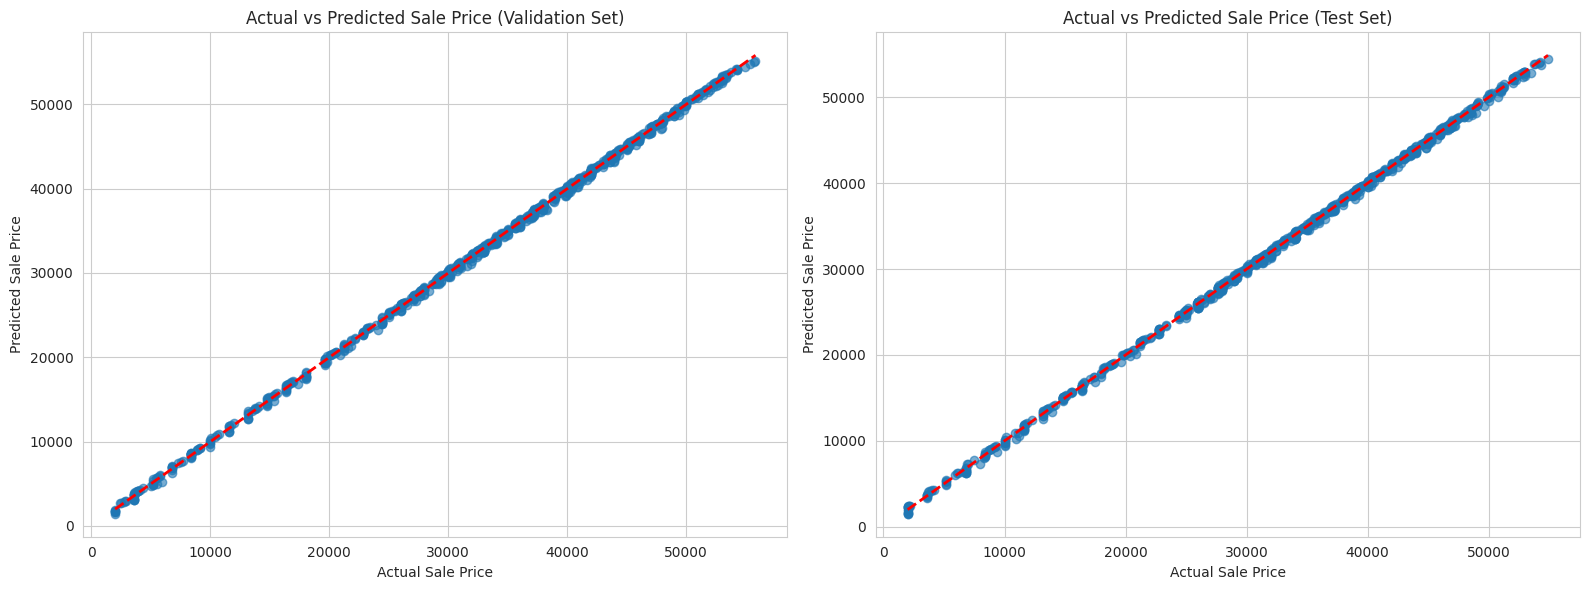

In [ ]:

# 1. Predict on the validation and test sets
y_val_pred = linreg.predict(X_val)
y_test_pred = linreg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Create scatter plot (val)
axes[0].scatter(y_val, y_val_pred, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title('Actual vs Predicted Sale Price (Validation Set)')
axes[0].grid(True)

# 4. Test Set Plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].set_title('Actual vs Predicted Sale Price (Test Set)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Decision Tree

In [ ]:

# 1. Initialize the Decision Tree model
tree_reg = DecisionTreeRegressor(random_state=42)

# 2. Train (fit) the model
tree_reg.fit(X_train, y_train)

# 3. Predict on Validation Set
y_val_pred = tree_reg.predict(X_val)

# 4. Evaluate the model
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print("Decision Tree Regressor Performance on Validation Set:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Decision Tree Regressor Performance on Validation Set:
MAE (Mean Absolute Error): 64.87
MSE (Mean Squared Error): 38272.37
RMSE (Root Mean Squared Error): 195.63
R² Score: 0.9998


In [ ]:
y_test_pred = tree_reg.predict(X_test)

# Evaluate on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("\n Decision Tree Regression Performance on Test Set:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {test_r2:.4f}")



 Decision Tree Regression Performance on Test Set:
Test MAE: 56.43
Test MSE: 30672.04
Test R² Score: 0.9998


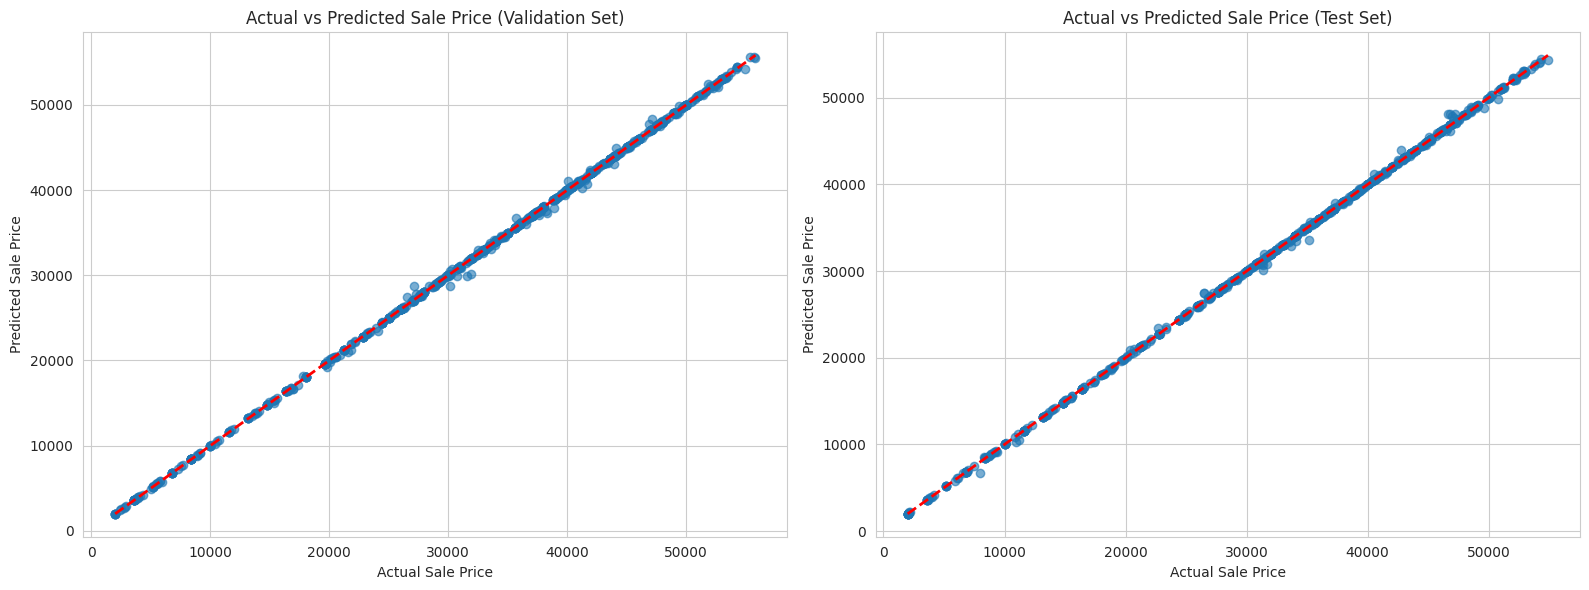

In [ ]:

# 1. Predict on the validation and test sets
y_val_pred = tree_reg.predict(X_val)
y_test_pred = tree_reg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Create scatter plot (val)
axes[0].scatter(y_val, y_val_pred, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title('Actual vs Predicted Sale Price (Validation Set)')
axes[0].grid(True)

# 4. Test Set Plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].set_title('Actual vs Predicted Sale Price (Test Set)')
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Random Forest

In [ ]:

forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train, y_train)

y_val_pred = forest_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
rf_val_r2 = r2_score(y_val, y_val_pred)

print("Random Forest Classifeir Performance on Validation Set:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {rf_val_r2:.4f}")

Random Forest Classifeir Performance on Validation Set:
MAE (Mean Absolute Error): 49.60
MSE (Mean Squared Error): 20619.94
RMSE (Root Mean Squared Error): 143.60
R² Score: 0.9999


In [ ]:
y_test_pred = forest_reg.predict(X_test)

# Evaluate on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)

print("\n Random Forest Regressor Performance on Test Set:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {rf_test_r2:.4f}")


 Random Forest Regressor Performance on Test Set:
Test MAE: 44.02
Test MSE: 18130.17
Test R² Score: 0.9999


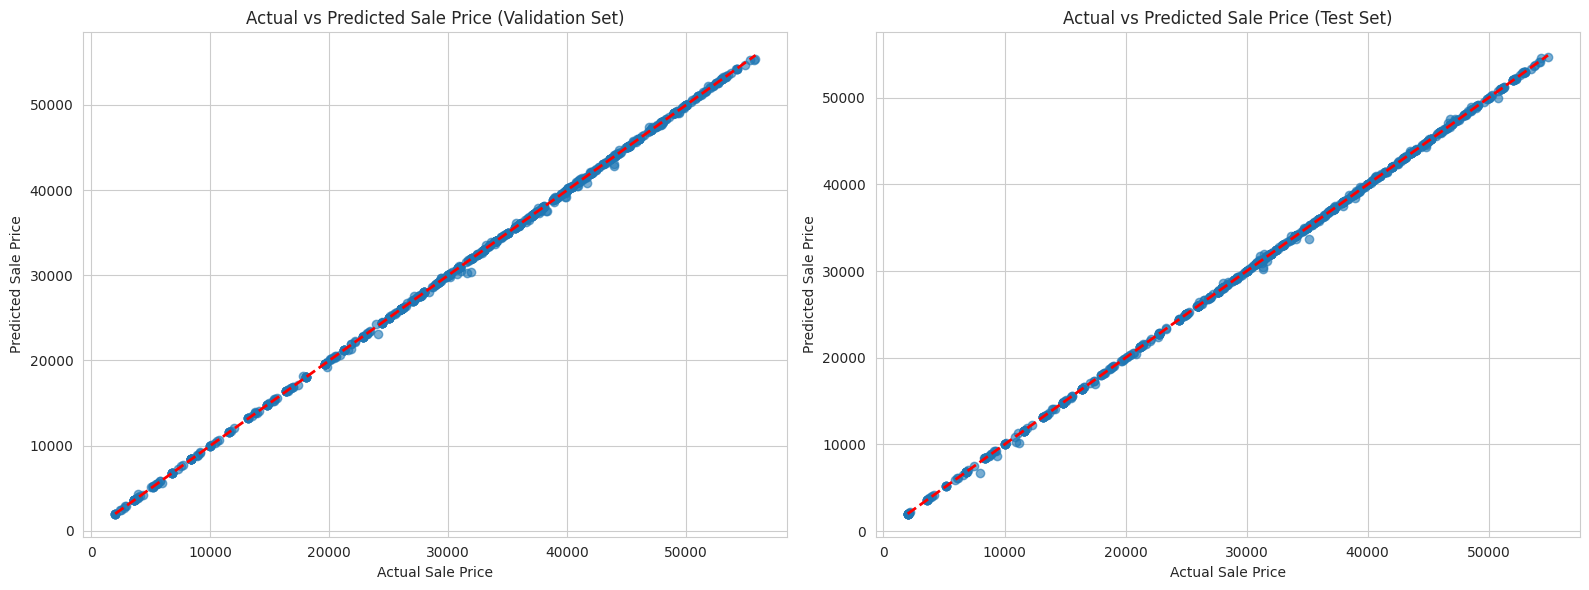

In [ ]:

# 1. Predict on the validation and test sets
y_val_pred = forest_reg.predict(X_val)
y_test_pred = forest_reg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Create scatter plot (val)
axes[0].scatter(y_val, y_val_pred, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title('Actual vs Predicted Sale Price (Validation Set)')
axes[0].grid(True)

# 4. Test Set Plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].set_title('Actual vs Predicted Sale Price (Test Set)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## XGB Regressor

In [ ]:


# Train XGBoost Regressor
xgb_reg = XGBRegressor(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_reg.fit(X_train, y_train)

# Predict on validation set
y_val_pred = xgb_reg.predict(X_val)

# Evaluation Metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
xgb_val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("XGBoost Regressor Performance on Validation Set:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {xgb_val_r2:.4f}")

XGBoost Regressor Performance on Validation Set:
MAE (Mean Absolute Error): 39.47
MSE (Mean Squared Error): 4879.56
RMSE (Root Mean Squared Error): 69.85
R² Score: 1.0000


In [ ]:
y_test_pred = xgb_reg.predict(X_test)

# Evaluate on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
xgb_test_r2 = r2_score(y_test, y_test_pred)

print("\n Random Forest Regressor Performance on Test Set:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {xgb_test_r2:.4f}")


 Random Forest Regressor Performance on Test Set:
Test MAE: 39.02
Test MSE: 4818.90
Test R² Score: 1.0000


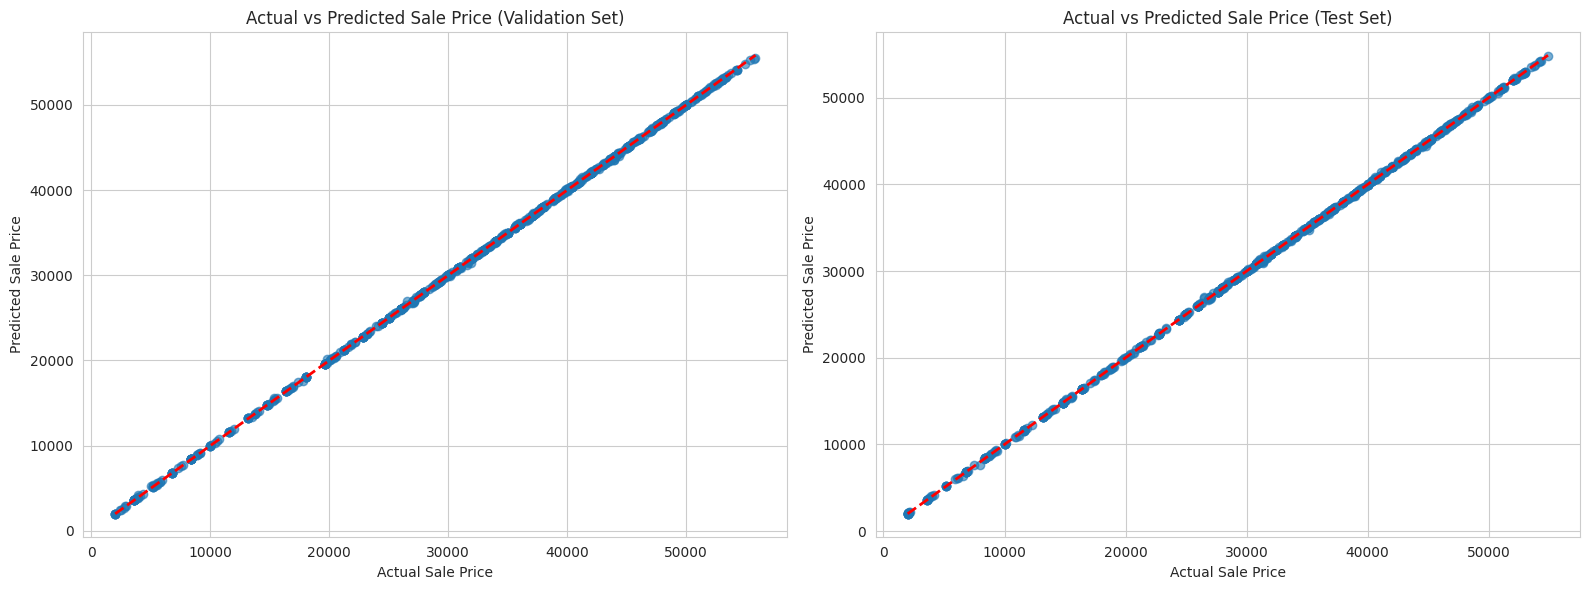

In [ ]:

# 1. Predict on the validation and test sets
y_val_pred = xgb_reg.predict(X_val)
y_test_pred = xgb_reg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Create scatter plot (val)
axes[0].scatter(y_val, y_val_pred, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title('Actual vs Predicted Sale Price (Validation Set)')
axes[0].grid(True)

# 4. Test Set Plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].set_title('Actual vs Predicted Sale Price (Test Set)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## KNRegressor

In [ ]:


# 1. Initialize the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=20)

# 2. Train (fit) the model
knn_reg.fit(X_train, y_train)

# 3. Predict on validation set
y_val_pred = knn_reg.predict(X_val)

# 4. Evaluate performance
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

# 5. Print the results
print("K-Nearest Neighbors Regressor Performance on Validation Set:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

K-Nearest Neighbors Regressor Performance on Validation Set:
MAE (Mean Absolute Error): 3611.41
MSE (Mean Squared Error): 31980994.97
RMSE (Root Mean Squared Error): 5655.17
R² Score: 0.8210


In [ ]:
y_test_pred = knn_reg.predict(X_test)

# Evaluate on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n K-Nearest Neighbors Regressor Performance on Test Set:")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R² Score: {test_r2:.4f}")


 K-Nearest Neighbors Regressor Performance on Test Set:
Test MAE: 3530.60
Test MSE: 31139240.10
Test R² Score: 0.8153


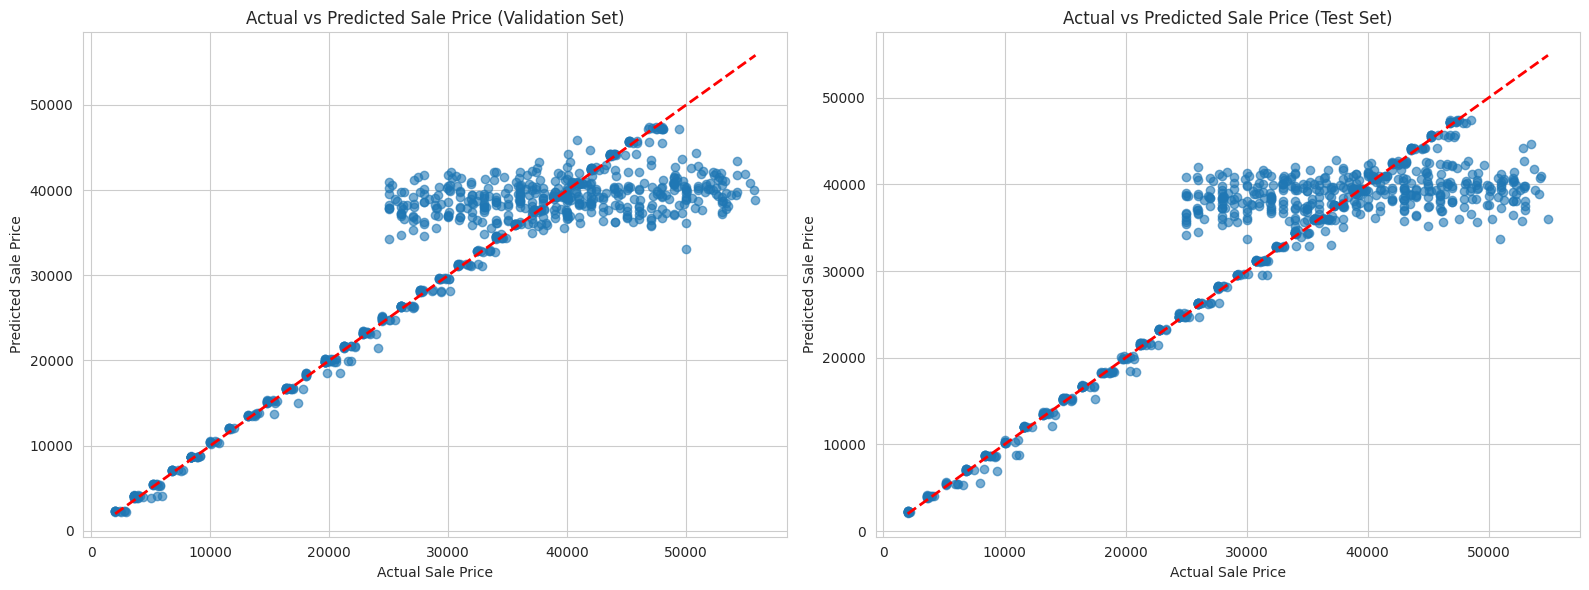

In [ ]:

# 1. Predict on the validation and test sets
y_val_pred = knn_reg.predict(X_val)
y_test_pred = knn_reg.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Create scatter plot (val)
axes[0].scatter(y_val, y_val_pred, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title('Actual vs Predicted Sale Price (Validation Set)')
axes[0].grid(True)

# 4. Test Set Plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].set_title('Actual vs Predicted Sale Price (Test Set)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Voting Regressor

In [ ]:
# 1. Initialize your three models
linreg = LinearRegression()
forest_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)

# 2. Fit each model individually
linreg.fit(X_train, y_train)
forest_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)

# 3. Create the Voting Regressor
voting_regressor = VotingRegressor(
    estimators=[
        ('lr', linreg),
        ('rf', forest_reg),
        ('xgb', xgb_reg)
    ]
)

# 4. Train (fit) the Voting Regressor
voting_regressor.fit(X_train, y_train)

# 5. Predict on Validation Set
voting_y_val_pred = voting_regressor.predict(X_val)

# 6. Evaluate on Validation Set
voting_val_mae = mean_absolute_error(y_val, y_val_pred)
voting_val_mse = mean_squared_error(y_val, y_val_pred)
voting_val_r2 = r2_score(y_val, y_val_pred)

print("Voting Regressor Performance on Validation Set:")
print(f"MAE (Mean Absolute Error): {voting_val_mae:.2f}")
print(f"MSE (Mean Squared Error): {voting_val_mse:.2f}")
print(f"R² Score: {voting_val_r2:.4f}")

# 7. Predict on Test Set
voting_y_test_pred = voting_regressor.predict(X_test)

# 8. Evaluate on Test Set
voting_test_mae = mean_absolute_error(y_test, y_test_pred)
voting_test_mse = mean_squared_error(y_test, y_test_pred)
voting_test_r2 = r2_score(y_test, y_test_pred)

print("\nVoting Regressor Performance on Test Set:")
print(f"Test MAE: {voting_test_mae:.2f}")
print(f"Test MSE: {voting_test_mse:.2f}")
print(f"Test R² Score: {voting_test_r2:.4f}")


Voting Regressor Performance on Validation Set:
MAE (Mean Absolute Error): 3611.41
MSE (Mean Squared Error): 31980994.97
R² Score: 0.8210

Voting Regressor Performance on Test Set:
Test MAE: 3530.60
Test MSE: 31139240.10
Test R² Score: 0.8153


## Bayesian Ensemble Model Predictor

In [ ]:
#Bayseian ensemble model prediction

total_val = lr_val_r2 + rf_val_r2 + xgb_val_r2

weights = [lr_val_r2 / total_val, rf_val_r2 / total_val, xgb_val_r2 / total_val]

# Weighted average
y_val_pred_weighted = (
    weights[0] * linreg.predict(X_val) +
    weights[1] * forest_reg.predict(X_val) +
    weights[2] * xgb_reg.predict(X_val)
)
bayes_val_mae = mean_absolute_error(y_val, y_val_pred_weighted)
bayes_val_mse = mean_squared_error(y_val, y_val_pred_weighted)
bayes_val_r2 = r2_score(y_val, y_val_pred_weighted)

print("\nBayesian Ensemble Performance on Valuation Set:")
print(f"Test MAE: {bayes_val_mae:.2f}")
print(f"Test MSE: {bayes_val_mse:.2f}")
print(f"Test R² Score: {bayes_val_r2:.4f}")

total_test = lr_test_r2 + rf_test_r2 + xgb_test_r2

weights = [lr_test_r2 / total_test, rf_test_r2 / total_test, xgb_test_r2 / total_test]

# Weighted average
y_test_pred_weighted = (
    weights[0] * linreg.predict(X_test) +
    weights[1] * forest_reg.predict(X_test) +
    weights[2] * xgb_reg.predict(X_test)
)
bayes_test_mae = mean_absolute_error(y_test, y_test_pred_weighted)
bayes_test_mse = mean_squared_error(y_test, y_test_pred_weighted)
bayes_test_r2 = r2_score(y_test, y_test_pred_weighted)

print("\nBayesian Ensemble Performance on Test Set:")
print(f"Test MAE: {bayes_test_mae:.2f}")
print(f"Test MSE: {bayes_test_mse:.2f}")
print(f"Test R² Score: {bayes_test_r2:.4f}")



Bayesian Ensemble Performance on Valuation Set:
Test MAE: 85.91
Test MSE: 14453.83
Test R² Score: 0.9999

Bayesian Ensemble Performance on Test Set:
Test MAE: 79.58
Test MSE: 12870.31
Test R² Score: 0.9999


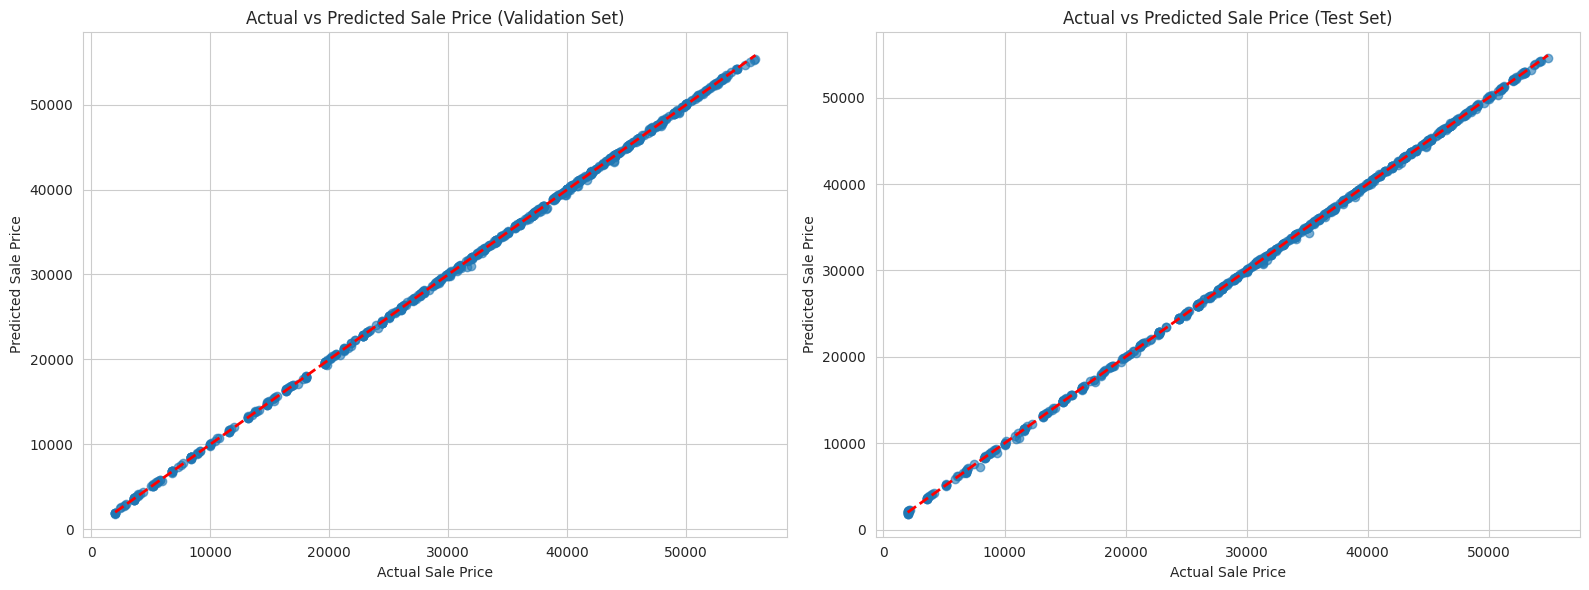

In [ ]:

# 1. Predict on the validation and test sets
bayes_y_val_pred_weighted = (
    weights[0] * linreg.predict(X_val) +
    weights[1] * forest_reg.predict(X_val) +
    weights[2] * xgb_reg.predict(X_val)
)
bayes_y_test_pred_weighted = (
    weights[0] * linreg.predict(X_test) +
    weights[1] * forest_reg.predict(X_test) +
    weights[2] * xgb_reg.predict(X_test)
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Create scatter plot (val)
axes[0].scatter(y_val, y_val_pred_weighted, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # perfect prediction line
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title('Actual vs Predicted Sale Price (Validation Set)')
axes[0].grid(True)

# 4. Test Set Plot
axes[1].scatter(y_test, y_test_pred_weighted, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Sale Price')
axes[1].set_ylabel('Predicted Sale Price')
axes[1].set_title('Actual vs Predicted Sale Price (Test Set)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Voting Regressor vs Bayesian Ensemble

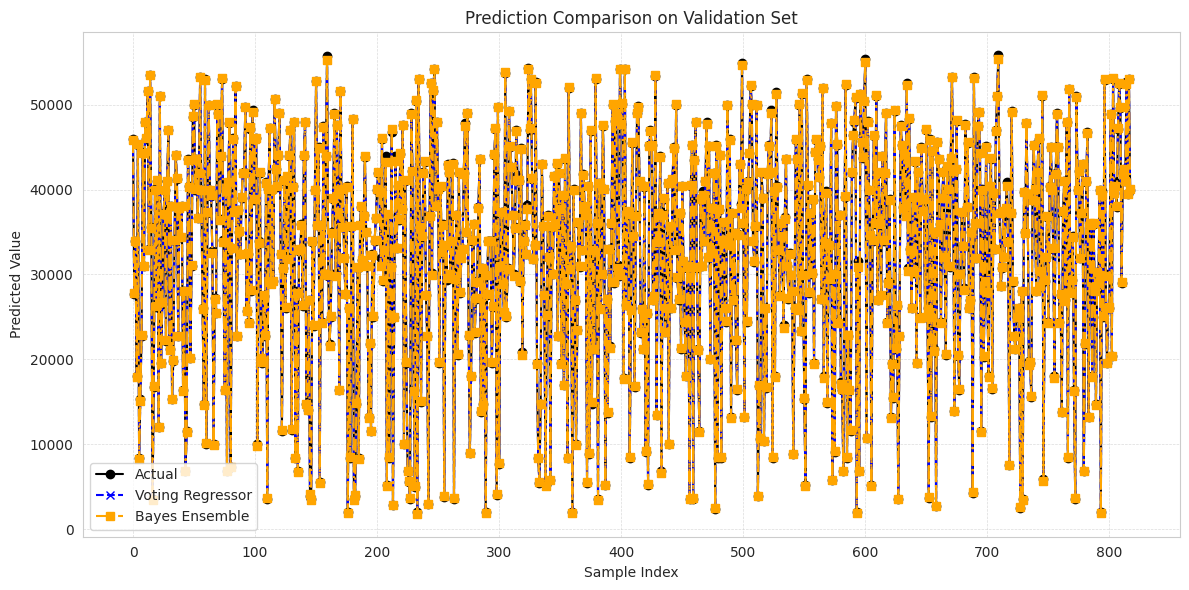

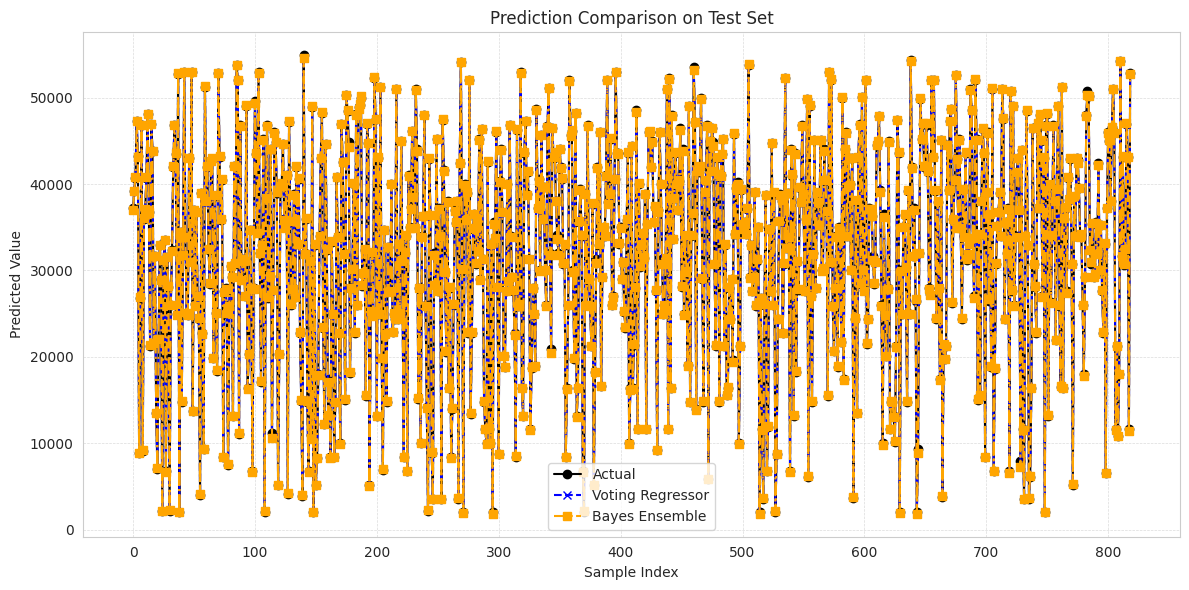

In [ ]:

sns.set_style("whitegrid")

#Validation Set Plot
plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual', linestyle='-', marker='o', color='black')
plt.plot(voting_y_val_pred, label='Voting Regressor', linestyle='--', marker='x', color='blue')
plt.plot(bayes_y_val_pred_weighted, label='Bayes Ensemble', linestyle='-.', marker='s', color='orange')

plt.legend()
plt.title('Prediction Comparison on Validation Set')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#Test Set Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linestyle='-', marker='o', color='black')
plt.plot(voting_y_test_pred, label='Voting Regressor', linestyle='--', marker='x', color='blue')
plt.plot(bayes_y_test_pred_weighted, label='Bayes Ensemble', linestyle='-.', marker='s', color='orange')

plt.legend()
plt.title('Prediction Comparison on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


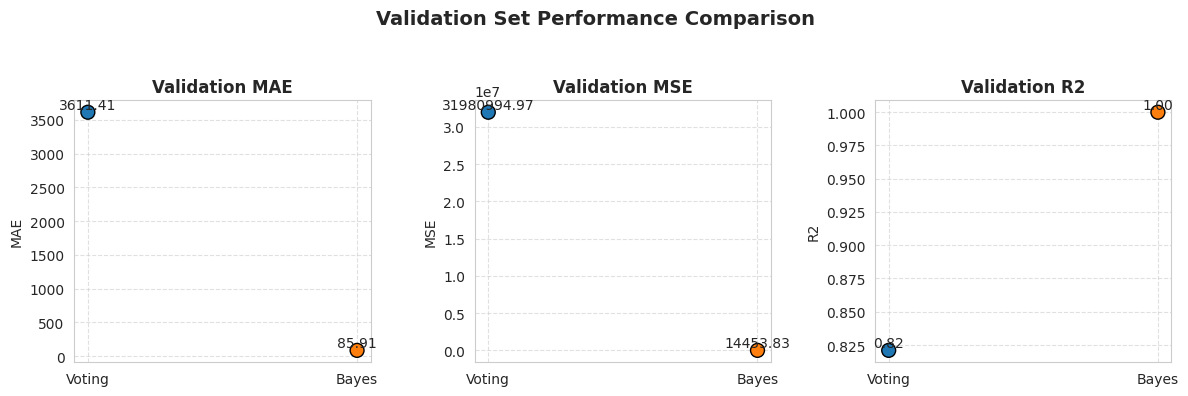

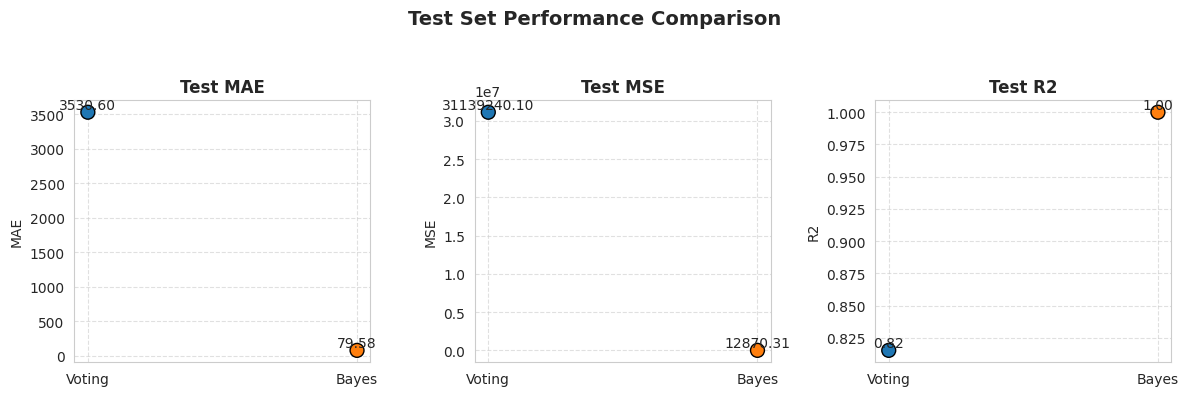

In [ ]:

# Set a clean style
sns.set_style("whitegrid")

# Metrics
metrics = ['MAE', 'MSE', 'R2']
colors = ['#1f77b4', '#ff7f0e']  # Voting: blue, Bayes: orange

# Scores
val_voting_scores = [voting_val_mae, voting_val_mse, voting_val_r2]
val_bayes_scores = [bayes_val_mae, bayes_val_mse, bayes_val_r2]
test_voting_scores = [voting_test_mae, voting_test_mse, voting_test_r2]
test_bayes_scores = [bayes_test_mae, bayes_test_mse, bayes_test_r2]

# Helper to annotate points
def annotate_points(x_labels, y_values):
    for x, y in zip(x_labels, y_values):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, fontweight='medium')

# Plot Validation Metrics
plt.figure(figsize=(12, 4))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    x = np.array([0, 1])
    y = [val_voting_scores[i], val_bayes_scores[i]]
    plt.scatter(x, y, color=colors, s=100, marker='o', edgecolor='black')
    annotate_points(x, y)
    plt.xticks([0, 1], ['Voting', 'Bayes'], fontsize=10)
    plt.title(f'Validation {metric}', fontsize=12, weight='bold')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Validation Set Performance Comparison', fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Plot Test Metrics
plt.figure(figsize=(12, 4))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    x = np.array([0, 1])
    y = [test_voting_scores[i], test_bayes_scores[i]]
    plt.scatter(x, y, color=colors, s=100, marker='o', edgecolor='black')
    annotate_points(x, y)
    plt.xticks([0, 1], ['Voting', 'Bayes'], fontsize=10)
    plt.title(f'Test {metric}', fontsize=12, weight='bold')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Test Set Performance Comparison', fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


#### Model of Choice: Bayesian Ensemble
* Lower MAE & MSE
* Perfect R-Squared score of 1.00
* Performed consistently well accross validation and test sets
